In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, 
    out_file="tree.dot", 
    class_names=iris_data.target_names,
    feature_names=iris_data.feature_names, 
    impurity=True, 
    filled=True
)


In [10]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.3 kB ? eta -:--:--
   ---------------------------------------- 47.3/47.3 kB 788.5 kB/s eta 0:00:00


In [12]:
import sys
print(sys.executable)

C:\ProgramData\anacondaaa\python.exe


In [13]:
!C:\ProgramData\anacondaaa\python.exe -m pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!C:\ProgramData\anacondaaa\python.exe -m pip install graphviz --user

In [1]:
import graphviz
print(graphviz.__version__)

0.21


In [2]:
import os
import graphviz

# dot.exe가 있는 폴더를 PATH에 강제로 추가
os.environ["PATH"] += os.pathsep + r"C:\Users\chjbr\Euron\Graphviz\bin"

print(graphviz.backend.version())

(13, 1, 2)


In [3]:
import graphviz
print(graphviz.backend.version())

(13, 1, 2)


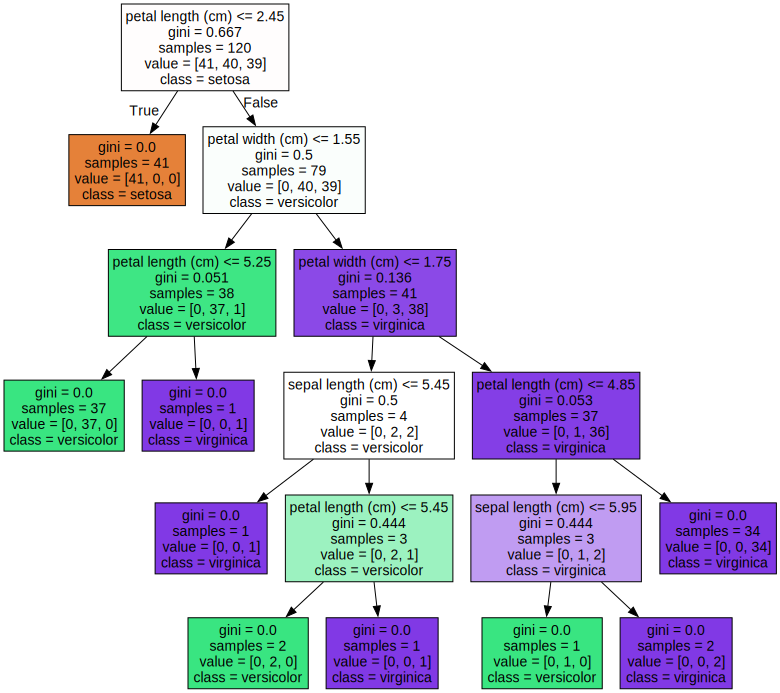

In [4]:
from sklearn.tree import export_graphviz
import graphviz

# .dot 파일 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.935 0.065]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.935
petal width (cm) : 0.065


C:\ProgramData\anacondaaa\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


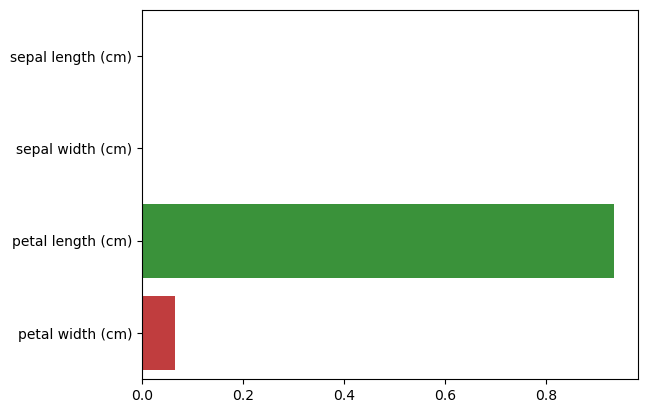

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=42
)

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf.fit(X_train, y_train)

#Feature Importance 출력
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

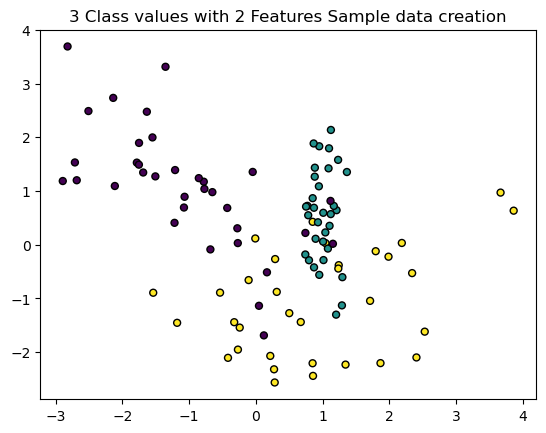

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1],
            marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_boundary(model, X, y):
    # 그래프 크기
    plt.figure(figsize=(8, 6))

    # 결정 경계 그리기 위한 grid 데이터 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 학습된 모델로 grid 데이터 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z, alpha=0.3)

    # 원래 데이터도 같이 scatter로 표시
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k', marker='o')
    plt.show()


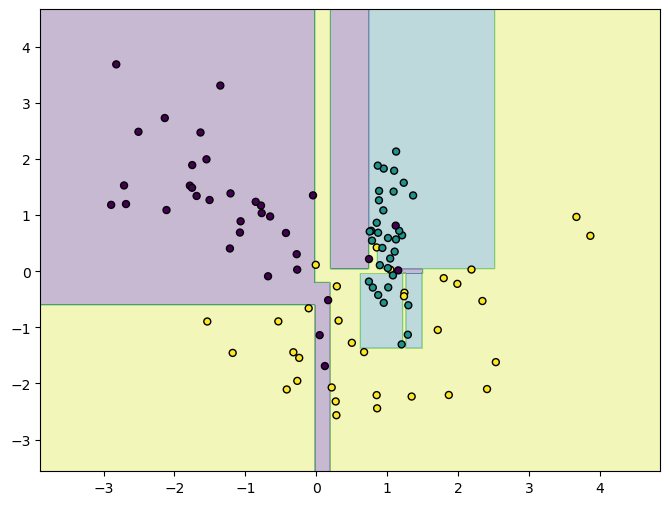

In [14]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

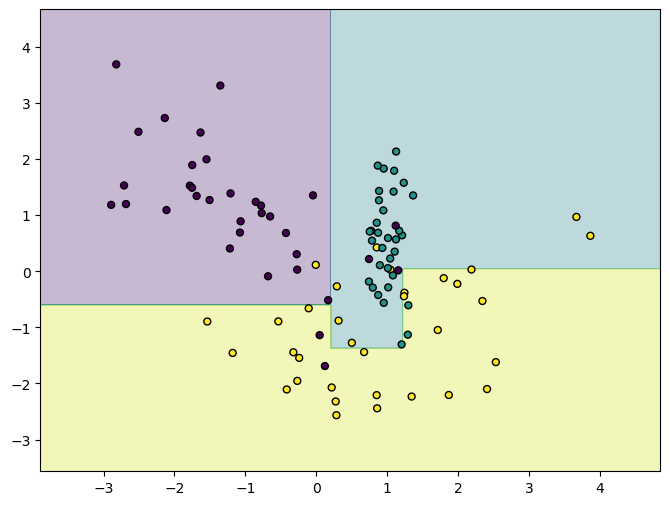

In [17]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)